### Logistic Regression  
Logistic regression is a type of model that  predicts the outcome of output values as Yes or no  as numeric values 1 or 0 respectively.<br>

#### Binomial Logistic Regression  
Binomial or binary logistic  predict exactly two outcomes  l(positive) or 0(negative)  <br> 

## Predict whether it will  rain or not if the temperature and humidity  percent are provided as input using Binomial Logistic Regression.
 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Data Preparation

In [2]:
dt=pd.read_csv('data/Rainfall_data.csv')
dt

,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes
...,...,...,...,...
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No


In [3]:

X= dt.drop(columns=['Index','Rain'])
Y=dt['Rain']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.01)

### Builing a Model 

In [4]:

Model= LogisticRegression()
Model.fit(X_train,Y_train)

LogisticRegression()

In [5]:
Model.predict([[33,70],
               [20,55]])

/Users/jigishap/.pyenv/versions/MachineLearning/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Yes', 'No'], dtype=object)

In [6]:
pred_y=Model.predict(X_test)

In [7]:
cmp=pd.DataFrame({'Predicted Values':pred_y.flatten(),
                  'Actual Values':Y_test.values})


In [8]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
en.fit(['Yes','No'])

LabelEncoder()

In [9]:
cmp['Actual Values']=en.transform(cmp['Actual Values'])
cmp['Predicted Values']=en.transform(cmp['Predicted Values'])

<AxesSubplot: ylabel='Density'>

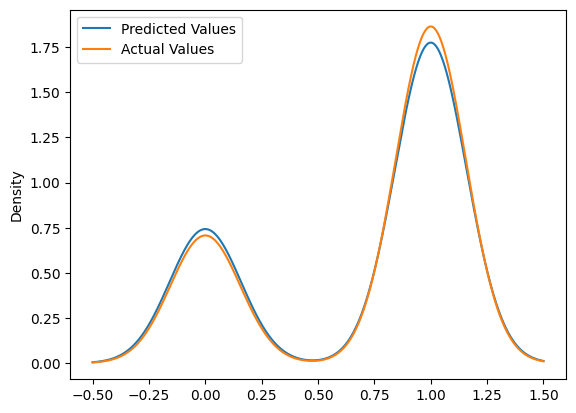

In [10]:
cmp.plot(kind='density')

In [11]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,pred_y)*100
print(acc)

92.0


### Multinomial Logistic Regression  
In multinomial logistic regression we perform classification into 2  or more categories also the categories can be just  different types like Rain, Hailstorm, Snow, etc. or  ordinal like Heavy rain, moderate rain or low rainfall  


# Predicted whether it will rain heavy, moderate  or low using multinomial Logistic regression. 

44.09886142738128


/Users/jigishap/.pyenv/versions/MachineLearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: ylabel='Density'>

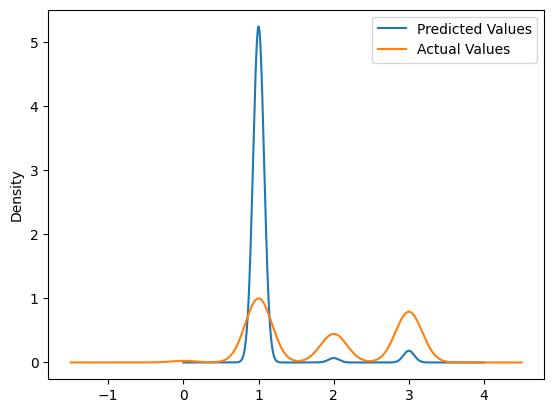

In [16]:

dt=pd.read_csv('data/Rainfalldata_multi.csv')
X= dt.drop(columns=['Rainfall'])
Y=dt['Rainfall']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
CModel= LogisticRegression()
CModel.fit(X_train,Y_train)
pred_y=CModel.predict(X_test)
en=LabelEncoder()
en.fit(['No Rain','Low','Moderate','High'])
cmp=pd.DataFrame({'Predicted Values':en.transform(pred_y),
                  'Actual Values':en.transform(Y_test)})
acc=accuracy_score(Y_test,pred_y)*100
print(acc)
cmp.plot(kind='density')

In [14]:
dt

,Temperature,Humidity%,Rainfall
0,34,74.2,Low
1,19,68.2,No Rain
2,28,67.2,Moderate
3,29,66.6,Moderate
4,26,57.9,Low
...,...,...,...
17996,31,89.7,No Rain
17997,21,84.7,No Rain
17998,28,74.7,No Rain
17999,30,78.2,No Rain
